<a href="https://colab.research.google.com/github/harperd/machine-learning/blob/master/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning

# Overview

*Unsupervised Learning* is the assignment of a set of *labeled feature data* (*observations*) into subsets called *clusters* so that observations in the same cluster are similar in some sense. Clustering of data is an optimization problem where a mathematical service or algorithm is used to identify how to best separated the labeled examples. *K-Means* clustering the the most common method which is used in this notebook.

# Import Python Packages

The first thing we want to do is import the basic Python packages such as *NumP*, *Matplotlib* and *Pandas*.

In [0]:
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection 
# of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics 
# extension NumPy. It provides an object-oriented API for embedding plots into applications using 
# general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
import matplotlib.pyplot as plt

# Pandas is a software library for data manipulation and analysis. In particular, it offers data 
# structures and operations for manipulating numerical tables and time series.
import pandas as pd

# Import Our Data

*Pandas* is the primary tool data scientists use for exploring and manipulating data. Most people abbreviate Pandas in their code as *pd*. Here, we import the data into a Pandas *DataFrame* which is the most important part of the Pandas library and will be used to process our data going forward. A *DataFrame* holds the type of data you might think of as a table. This is similar to a sheet in Excel, or a table in a SQL database.

Here are the different parts of a data set:

- **Labels** - Future outcomes. This is the value we are trying to predict.
- **Features (Dimensions)** - All other attributes used to predict Labels. Any attribute chosen to be used as a data point in the training data set. eg. Age, occupation, sex, zip code, etc.
- **Feature Vector** - The distinct values of a single feature.
- **Example** - A single Feature value or point on the graph or Feature Vector.

![](https://github.com/harperd/machine-learning/blob/master/images/dataparts.gif?raw=1)

Let's configure the data file that will used in this interactive tutorial. For now, this tutorial expects a CSV file but can easily be up dated to accomodate other data sources and file formats.

In [0]:
data_file    = 'https://raw.githubusercontent.com/harperd/machine-learning/master/data/cardiacData.csv'
features     = [ 'HeartRate', 'Att', 'STE', 'Age', 'Outcome' ]
data_header  = None

First, let's read the file and create our *DataFrame*.

In [0]:
df_raw = pd.read_csv(data_file, header = data_header, names = features, low_memory = False)
%time print(f"{len(df_raw.index)} rows read.")

250 rows read.
CPU times: user 209 µs, sys: 0 ns, total: 209 µs
Wall time: 214 µs


Now, we can take a quick look at some of the data in our DataFrame to see what it looks like and make sure it loaded okay.

In [0]:
df_raw.head()

,HeartRate,Att,STE,Age,Outcome
0,84,0,55,0,0
1,76,0,80,0,0
2,50,0,80,0,0
3,60,0,44,0,0
4,106,0,77,1,0


# Understanding Our Data

In any sort of data science work, it's important to look at your data, to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect.

## File Metadata

Looking at the data types int the file will help us understand the file format. If we notice a column or *Feature*, that we want to include in our data set that is non-numeric we will want to convert that to a numeric data type when we begin *Feature Engineering* (pre-processing our data).

In [0]:
df_raw.dtypes

HeartRate    int64
Att          int64
STE          int64
Age          int64
Outcome      int64
dtype: object

## Data Sample

In [0]:
with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
    display(df_raw.tail())

,HeartRate,Att,STE,Age,Outcome
245,97,1,87,0,1
246,78,0,79,0,0
247,66,0,89,0,0
248,71,0,68,0,0
249,73,0,49,1,0


## Describing Our Data

The first number, the count, shows how many rows have non-missing values.

Missing values arise for many reasons. For example, the size of the 2nd bedroom wouldn't be collected when surveying a 1 bedroom house. We'll come back to the topic of missing data.

The second value is the mean, which is the average. Under that, std is the standard deviation, which measures how numerically spread out the values are.

To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

In [0]:
df_raw.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
HeartRate,250.0,70.008,14.472795,26.0,61.00,70.0,78.0,110.0
Att,250.0,0.104,0.305873,0.0,0.00,0.0,0.0,1.0
STE,250.0,65.548,14.091486,23.0,55.25,67.0,76.0,99.0
Age,250.0,0.360,0.513278,0.0,0.00,0.0,1.0,2.0
Outcome,250.0,0.332,0.471876,0.0,0.00,0.0,1.0,1.0


# Visualizing Our Data

Visualizing the data is key to helping understand the makeup of the data and it's attributes (Feature Vectors). This helps to find ways to tune the model as well as outliers or data that may need standardized.

## Histograms

A fast way to get an idea of the shape of the data, which is to say, the distribution (or density) of each *feature* is to look at *histograms*.

Histograms represent the distribution of a continuous variable (*feature* in this case) over a given interval or period of time. Histograms plot the data by dividing it into intervals called *bins*. It is used to inspect the underlying frequency distribution or shape of the data such as Gaussian (eg. Normal distribution), outliers, skewness, etc.

In a histogram, it is the area of the bar that indicates the frequency of occurrences for each bin. This means that the height of the bar does not necessarily indicate how many occurrences of scores there were within each individual bin. It is the product of height multiplied by the width of the bin that indicates the frequency of occurrences within that bin. 

[Types of distributions](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/)

### Choosing a Bin Number

Setting bins to a higher or lower number will yeild denser or sparser results. The choice of bin width significantly affects the resulting plot. Smaller binwidths can make the plot cluttered, but larger binwidths may obscure nuances in the data. *Matplotlib* will automatically choose a reasonable binwidth for you, but you can specify the binwidth yourself after trying out several values. There is no true right or wrong answer, you just have to try different bin values and see which works best for your particular data.

> **TIP:** If you have a small amount of data, use wider bins to eliminate noise. If you have a lot of data, use narrower bins because the histogram will not be that noisy.

**What to look for:** Normal or *Guassian* distributions are preferred to work with since data tends to cluster at a given point. This is necessary when using a clustering algorithm, such as *K-Means*. If we don't see good clusting of feature data, then we may need to get more data or the data may not be able to usable for clustering. The image below depicts a normal distribution of data that tends to cluster towards the value 0.0.

![](https://github.com/harperd/machine-learning/blob/master/images/normal-distribution.png?raw=1)

Execute the below to see a histogram of the data.

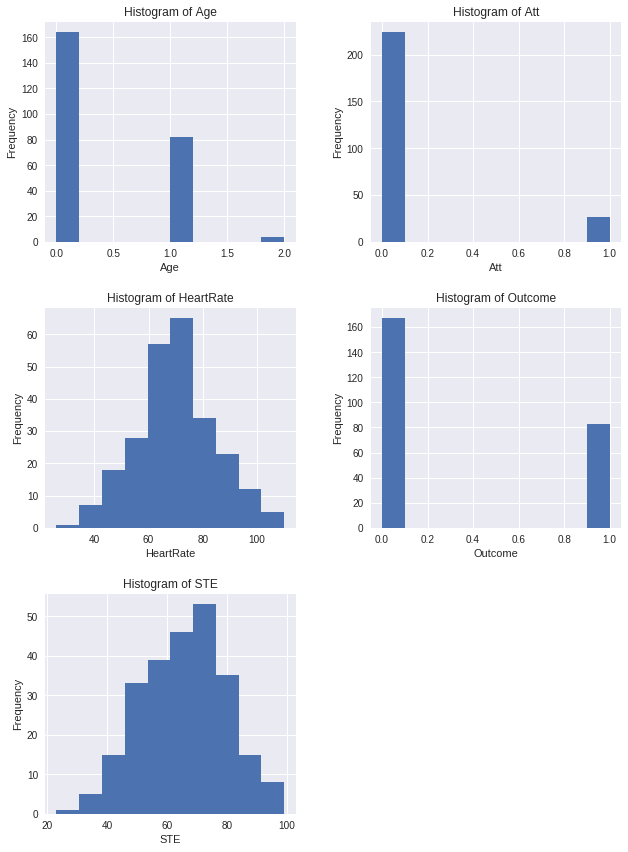

In [0]:
# Using the Data Frame we will produce histograms of each attribute
# with an optional specified number of bins. Matplotlib will automatically
# choose a reasonable binwidth for you if set to None.
axarr = df_raw.hist(histtype = 'bar', bins = 10)

for ax in axarr.flatten():
    feature = ax.get_title()
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    
plt.subplots_adjust(left = 3, right = 4, top = 10, bottom = 8, wspace = None, hspace = None)
plt.show()

## Density Plots

There is also another, often clearer, way to grasp the distribution: density plots or, more formally, *Kernel Density Plots*. They can be considered a smoothed version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins.

**What to look for:** Here again, we want to see if there are any normal distributions of the data.

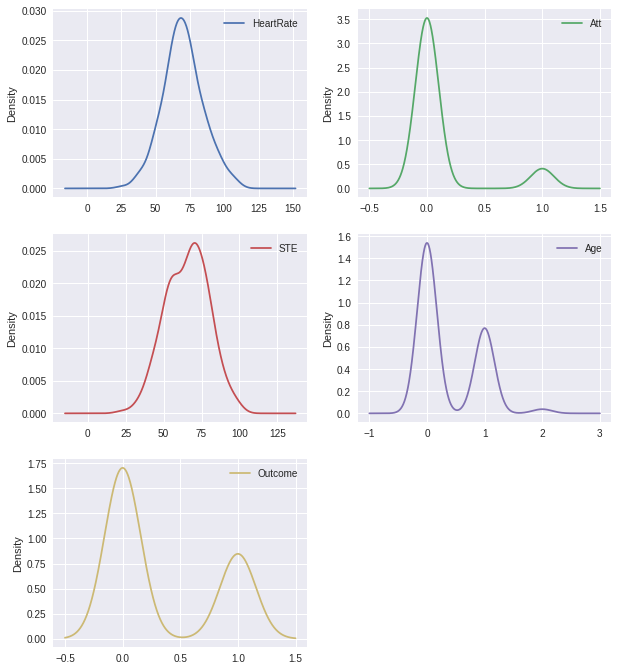

In [0]:
df_raw[features].plot(
    kind = 'density', 
    # A tuple (rows, columns) for the layout of subplots.
    layout = (len(features), 2), 
    # A tuple (width, height) in inches.
    figsize = (10, 20), 
    # Make separate subplots for each column.
    subplots = True, 
    # In case subplots=True, share x axis and set some x axis labels to invisible; 
    # defaults to True if ax is None otherwise False if an ax is passed in; Be aware, 
    # that passing in both an ax and sharex=True will alter all x axis labels for 
    # all axis in a figure!
    sharex = False)
plt.show()

## Box-And-Whisker Plot

A *Box Plot* or *Box and Whisker* plot is good for understanding various aspects of a *Feature* in a single graph. This includes the median, 1st and 3rd quartiles (25% and 75% of the data so what is inside the box is 50% of the data or *Examples*) and the maximum value and the minimum value.

**What to look for:** Data that is fairly well distributed will resemble the image below with a box near the middle, representing 50% of the data, and the median value towards the center of the box.

![](https://github.com/harperd/machine-learning/blob/master/images/boxplot.png?raw=1)

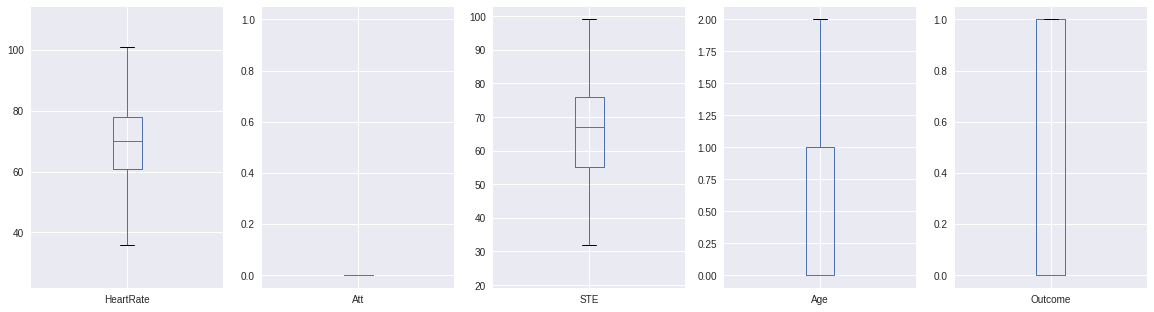

In [0]:
df_raw.plot(
    kind = 'box',
    # A tuple (rows, columns) for the layout of subplots.
    layout = (len(features), 5), 
    # A tuple (width, height) in inches.
    figsize = (20, 30), 
    # Make separate subplots for each column.
    subplots = True, 
    # In case subplots=True, share x axis and set some x axis labels to invisible; 
    # defaults to True if ax is None otherwise False if an ax is passed in; Be aware, 
    # that passing in both an ax and sharex=True will alter all x axis labels for 
    # all axis in a figure!
    sharex = False)
plt.show()

## Scatter Matrix

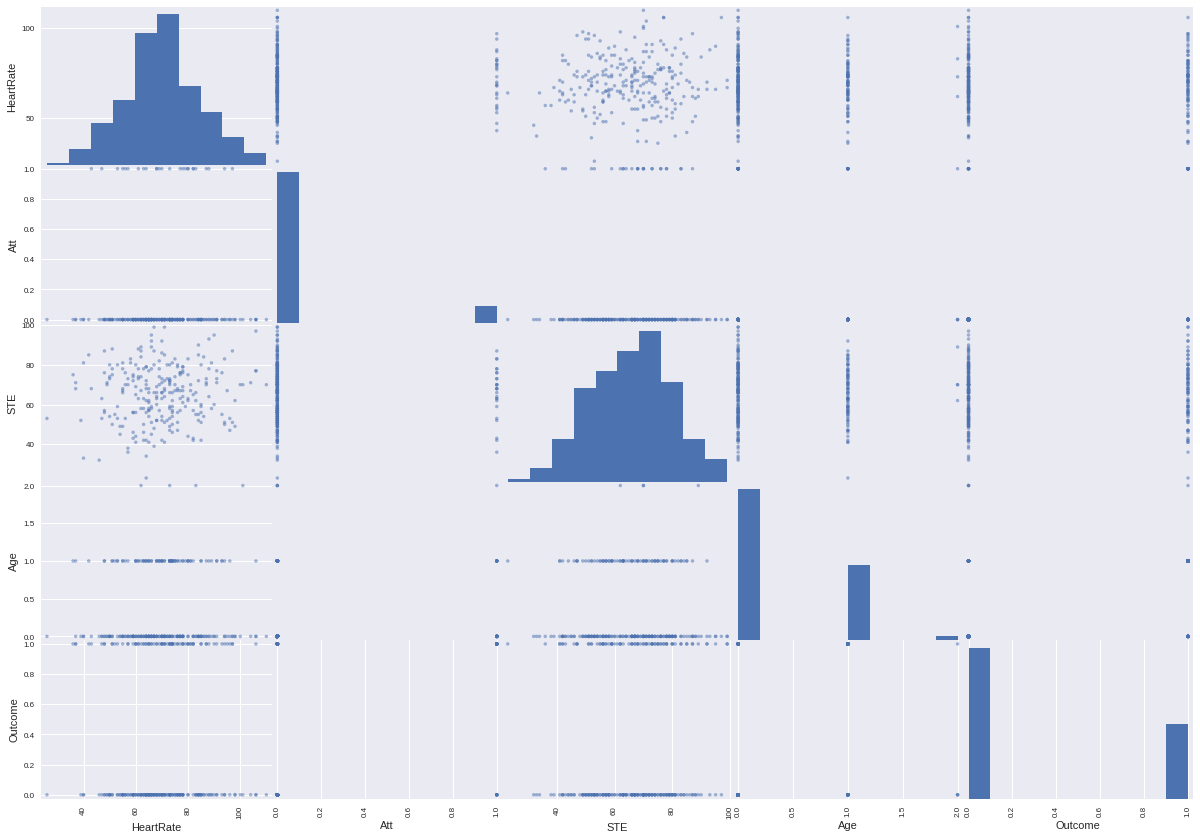

In [0]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_raw)
plt.subplots_adjust(left = 3, right = 5, top = 10, bottom = 8, wspace = None, hspace = None)
plt.show()

# Feature Engineering

# Clustering

Clustering, in Machine Learning, is the assignment of a set of *observations* into subsets (called *clusters*) so that observations in the same cluster are similar in some sense. Clustering is a method of *unsupervised learning*, and a common technique for statistical data analysis used in many fields. Clustering is an optimization problem. We need to identify the best cluster of *Features*. When given *labeled data* we need identify the mathematical service that best separates the labeled examples. However, this is subject to constraints to avoid overfitting. 

For labeled data we want to find the boundaries in Feature space that separate different classes of labeled Examples. New data assigned to class based on it’s portion of the Feature space carved out by classifier surface in which it lies.

- Look for a simple surface (e.g. best line or plane) that separates the classes or clusters.
- Look for more complex surfaces, subject to constraints, that separate classes.
- Use K nearest neighbor (voting scheme) which use majority vote to select labels.

*K-Means* is the most common Unsupervised clustering algorithm.

- Useful when the number of necessary clusters (k) is known.
- Faster than Hierarchical such as Random Forests.

## Clustering Constraints

Learned models (clusters) will depend on certain constraints:

- The distance metric between examples (Minkowski + Linkage)
- Which Features to include (Feature Vectors)
- Constraints on the complexity of the model to avoid overfitting (each Example is its own cluster):
- The specified number of clusters (k)
- Complexity of the separating surface

## Basic Logic

1. Randomly choose k examples as initial centroids
2. For each centroid, create k clusters by assigning each example to the closest centroid.
3. Compute k new centroids by averaging examples in each cluster.
4. Continue until centroids don’t change.

# K-Means Clustering

*K-Means* is an unsupervised machine learning algorithm (data is labeled) that groups a dataset into a user-specified number of clusters. This algorithm is somewhat naive as it clusters the data into a user specified k clusters, even if k is not the right number of clusters to use. Therefore, it is sometimes a challenge to find the optimal value for k. An optimial k is one where increasing k doesn't give much better model of the data.

In [0]:
from sklearn.cluster import KMeans

# Function for K-Means clustering used in the following sections.
def cluster_kmeans(df, k):
    model = KMeans(
        #
        # KMeans Hyperparameters
        #
        
        # The number of clusters to form as well as the number of centroids to generate.
        n_clusters = k, 
        # Method for initialization, defaults to ‘k-means++’:
        # ‘k-means++’: selects initial cluster centers for k-mean clustering in a smart way to 
        #              speed up convergence.
        # ‘random’: choose k observations (rows) at random from data for the initial centroids.
        init = 'k-means++',
        # Maximum number of iterations of the k-means algorithm for a single run.
        max_iter = 300,
        # Number of time the k-means algorithm will be run with different centroid seeds. 
        # The final results will be the best output of n_init consecutive runs in terms of inertia.
        n_init = 10,
        # Determines random number generation for centroid initialization. Use an int to 
        # make the randomness deterministic. 
        random_state = 0)
    # Compute k-means clustering.
    return model.fit(df)
 
print("Function cluster_kmeans() created.")

Function cluster_kmeans() created.


## Measuring Distance Between Clusters

Before we get too far into clustering we should cover how distances between features vectors and clusters is determined. Distance between clusters is computed by identifying which features to measure distance between (Linkage Metric) and measuring the actual distance between the identified features using the Minkowski method.

- **Single-Linkage** considers the distance between clusters using the shortest distance from any member (example) of one cluster to any member of the other cluster.

    ![](https://github.com/harperd/machine-learning/blob/master/images/single-linkage.jpg?raw=1)

- **Complete-Linkage** considers the distance between clusters using the greatest distance from any member (example) of one cluster to any member of the other cluster.

     ![](https://github.com/harperd/machine-learning/blob/master/images/complete-linkage.jpg?raw=1)

- **Average-Linkage** considers the distance between clusters using the average distance from any member (example) of one cluster to any member of the other cluster.

    ![](https://github.com/harperd/machine-learning/blob/master/images/average-linkage.jpg?raw=1)

## Minkowski Metric

This is the basis for finding distances between Features (or Examples) for *Euclidean*, which is the most common, and *Manhattan* distances:

![](https://github.com/harperd/machine-learning/blob/master/images/minkowski.jpg?raw=1)

Two different ways to use the equation. For *Euclidean Distance* (straight line between two points) use p = 2, For *Manhattan Distance* (along axises only) use p = 1.

![](https://github.com/harperd/machine-learning/blob/master/images/manhattan-euclidean.jpg?raw=1)

>**NOTE:** Euclidean is mostly used. Manhattan is sometimes used when different Features (or Dimensions) are not comparable or higher dimensional data. For example, age vs. other Features that are binary in nature, such as “wears glasses”.

**Other distance metrics:** Chebyshev, Cosine, Canberra

In [0]:
import scipy.spatial.distance as dist

model = cluster_kmeans(df_raw, k = 3)

# Create some clusters with random data
cluster_A = model.cluster_centers_[0]
cluster_B = model.cluster_centers_[1]
dimensions = len(cluster_A)

print(f'Distance measurements with {dimensions}-dimensional vectors')
print()
print('Euclidean distance is', dist.euclidean(cluster_A, cluster_B))
print('Manhattan distance is', dist.cityblock(cluster_A, cluster_B))
print('Chebyshev distance is', dist.chebyshev(cluster_A, cluster_B))
print('Canberra distance is', dist.canberra(cluster_A, cluster_B))
print('Cosine distance is', dist.cosine(cluster_A, cluster_B))

Distance measurements with 5-dimensional vectors

Euclidean distance is 25.57824728864754
Manhattan distance is 32.54092827004217
Chebyshev distance is 24.198452883263002
Canberra distance is 0.367205996244354
Cosine distance is 0.025064642649878288


## Choosing K

There are different ways to choose a number of clusters (k) such as have a priori knowledge about the application domain. But that is more than likely not the case in the real world. You can use hierarchical clustering on a subset of data where each leaf node in a tree is a cluster but this is slow on larger datasets and not an optimal way of choosing a value for k. Other more common ways are outlined in detail in the following sections.

Things to consider when choosing K:

- Results can depend on location of initial centroids.
- Choosing the wrong k value can lead to inaccurate results.
- Hyperparameters may need to be tuned to get a better model fit.

### Method 1: Measuring Model Optimization

One way to find an optimal value for k is int trying different values of k and evaluate quality of results (dissimilarity).


**Cluster Variability** is the sum of the distance between the cluster mean (centroid) and each example then square the result. A low value denotes a tight cluster. 'c' denotes a single cluster and 'e' denotes a single vector within the cluster.

![](https://github.com/harperd/machine-learning/blob/master/images/variability.jpg?raw=1)

**Model Dissimilarity** is the sum of all the cluster variabilities. High model dissimilarities result in an underfit model so constraints need to be applied as “guardrails” to provide a more fit model such as fewer clusters (k) or some feature values need to be scaled. 'c' denotes a single cluster, 'C' denotes all clusters or the model and 'e' denotes a single vector within the cluster.

![](https://github.com/harperd/machine-learning/blob/master/images/dissimilarity.jpg?raw=1)

>**CAUTION:** Overfitting and underfitting are the two biggest causes for poor performance of machine learning algorithms. Ideally, you want to select a model at the sweet spot between underfitting and overfitting.

#### Cluster Variability

To measture the dissimilarity of the model *C* we need to first create a function that will measure the variaiblity of a single cluster. We will use Euclidean Distance as it is more common.

In [0]:
import scipy.spatial.distance as dist

def variability(c):
    v = 0
    centroid = c.mean()
    for e in c:
         v = v + ( dist.euclidean(centroid, e) ** 2 )
    return v
  
print("Function variability() created.")

Function variability() created.


#### Model Dissimilarity

Now that we have a function to measture the variaiblity of each cluster we can then employ that function to measure the dissimilarity of our model.

In [0]:
def dissimilarity(C):
    d = 0
    for c in C:
        d = d + variability(c)
    return d
  
print("Function dissimilarity() created.")

Function dissimilarity() created.


Finally, lets analyze the dissimilarity of our model.

**What to look for:** We want to identify the k value just before the dissimilarity value starts showing our model is starting to underfit. Too low of a value means the model is overfit. A good k value is somewhere in the middle. Using the below as an example, we would choose a k of 3.

> ```
Model dissimilarity with k = 1 is 4479.537427199999
Model dissimilarity with k = 2 is 10276.53491116935
Model dissimilarity with k = 3 is 15824.206394492456
Model dissimilarity with k = 4 is 24273.153638284602
Model dissimilarity with k = 5 is 30715.503779356583
```

In [0]:
def print_variabilities(C):
    # Output the variability of each cluster. Not nessary but provides more detail.
    i = 1

    for c in C:
        print(f"\tCluster {i} variability is {variability(c)}")
        i = i + 1

def print_dissimilarity(model, show_variability):
    C = model.cluster_centers_
    k = len(C)
    
    # Output the model dissimilarity
    print(f"Model dissimilarity with k = {k} is {dissimilarity(C)}")
    
    if(show_variability):
        print()
        print_variabilities(C)
        print()
        
# k values we what to try
samples = 6

for k in range(1, samples):
    model = cluster_kmeans(df_raw, k)
    print_dissimilarity(model, show_variability = False)

Model dissimilarity with k = 1 is 5479.537427199999
Model dissimilarity with k = 2 is 11276.53491116935
Model dissimilarity with k = 3 is 16824.206394492456
Model dissimilarity with k = 4 is 23273.153638284602
Model dissimilarity with k = 5 is 29715.503779356583


###  Method 2: Elbow Method (Sum of Squared Errors)

This method looks at the percentage of variance explained as a function of the number of clusters. Achieving this yeilds and optimal value for k. The idea of the elbow method is to run K-Means clustering on the dataset for a range of values of k (k from 1 to 10 for example). Then, for each value of k, calculate the *Sum of Squared Errors (SSE)* or *Within Cluster Sum of Squares (WCSS)*. The smaller the SSE the better and the SSE tends to decrease toward 0 as we increase k. When SSE is 0 then k is equal to the number of data points (or *Examples*) in the dataset. This is because each data point is its own cluster (*Over Fitting*), and there is no error between it and the center of its cluster.

**What to look for:** The goal is to choose a small value of k that still has a low SSE. The elbow usually represents where we start to have diminishing returns by increasing k. In the example below, a k of 3 is the optimal number.

![](https://github.com/harperd/machine-learning/blob/master/images/elbow-method.png?raw=1)

101744.24799999999

67651.31445814073

44109.87341772152

35282.09934065934

28439.43935059896

23529.219979559028

20091.796980103576

17653.372012987013

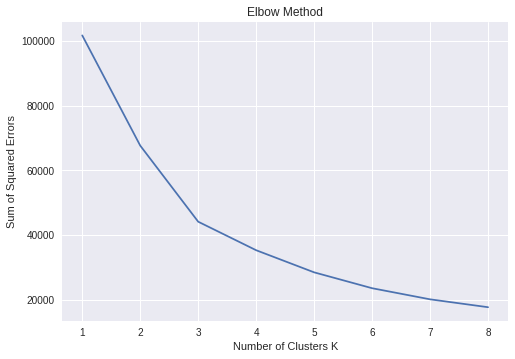

In [0]:
sse = []
samples = 9

# Try different values for k and record the results.
for k in range(1, samples):
    model = cluster_kmeans(df_raw, k)
    # interia_ is the sum of squared distances of samples 
    # to their closest cluster center.
    sse.append(model.inertia_)
    display(model.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, samples), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('Sum of Squared Errors')
plt.show()

### Method 3: Average Silhouette Method

*Silhouette Analysis* can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) are:

- **Near +1** indicate that the sample is far away from the neighboring clusters.
- **0** indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
- **Negative values** indicate that those samples might have been assigned to the wrong cluster.

When k = 2 the average silhouette_score is: 0.3021807114941397
When k = 3 the average silhouette_score is: 0.3467030401711417
When k = 4 the average silhouette_score is: 0.3284735173910422
When k = 5 the average silhouette_score is: 0.33432817044493063
When k = 6 the average silhouette_score is: 0.335372235286428
When k = 7 the average silhouette_score is: 0.3390782723367
When k = 8 the average silhouette_score is: 0.34906365821387497
When k = 9 the average silhouette_score is: 0.34277569399268565


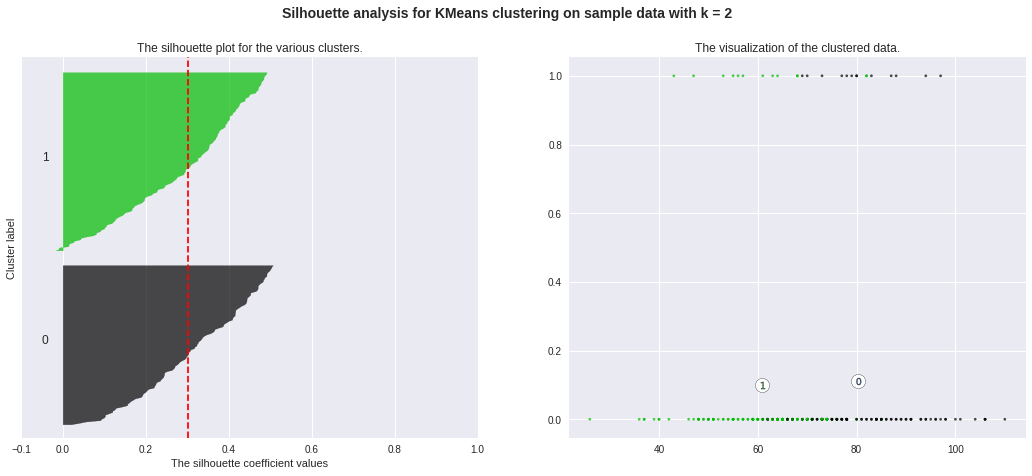

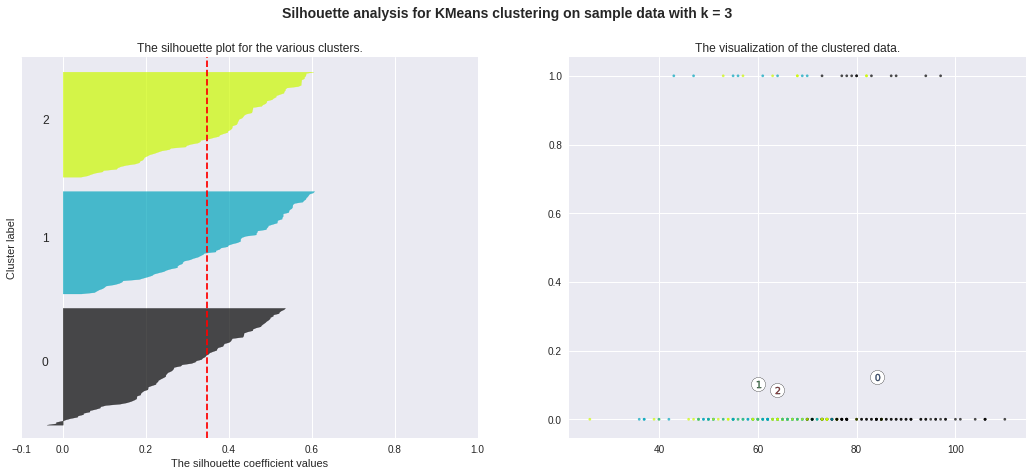

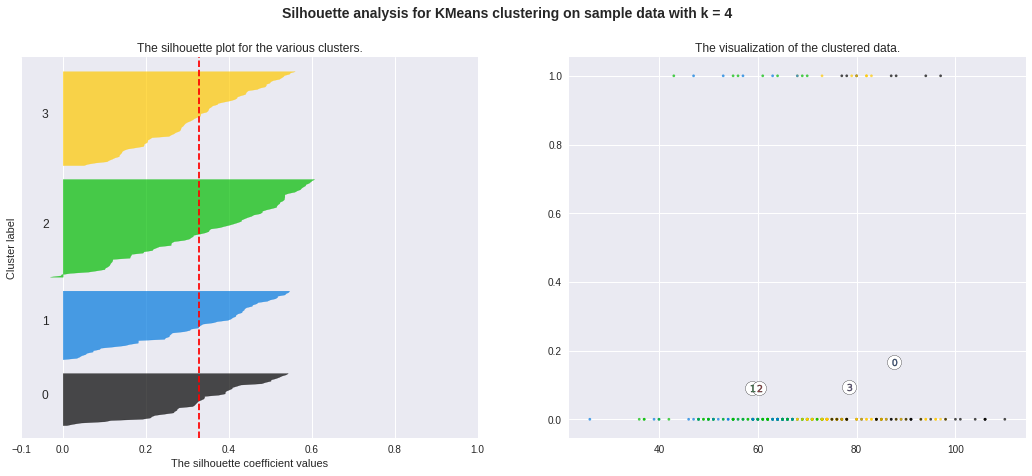

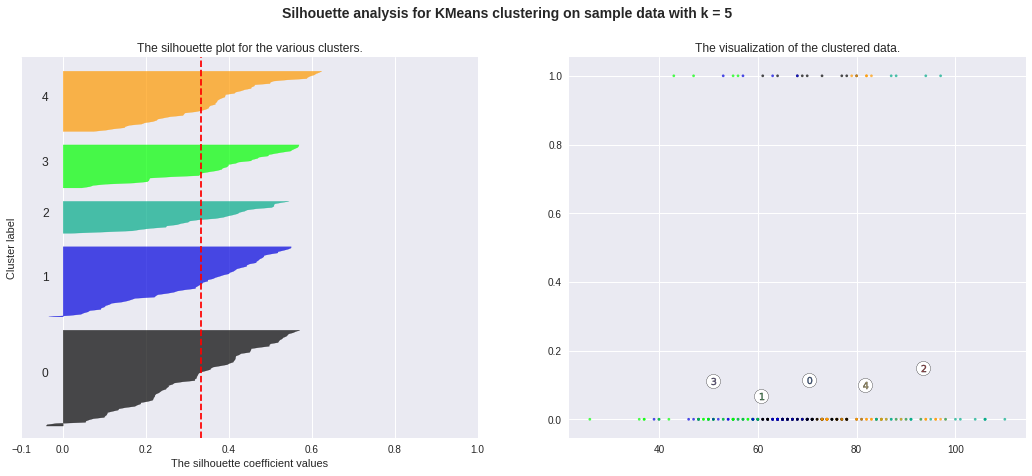

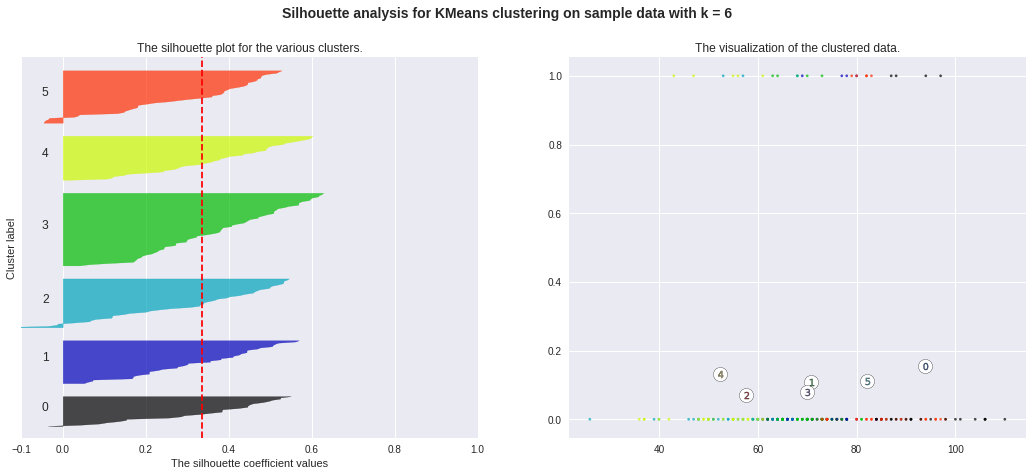

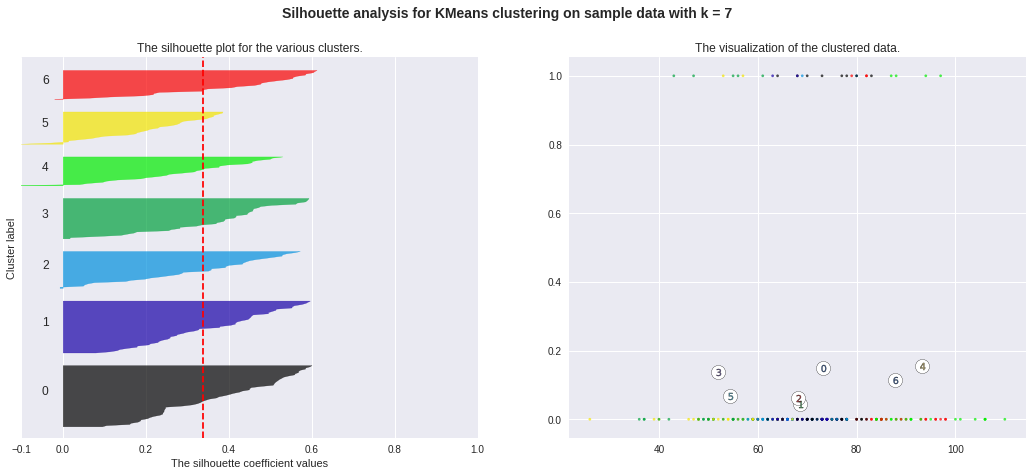

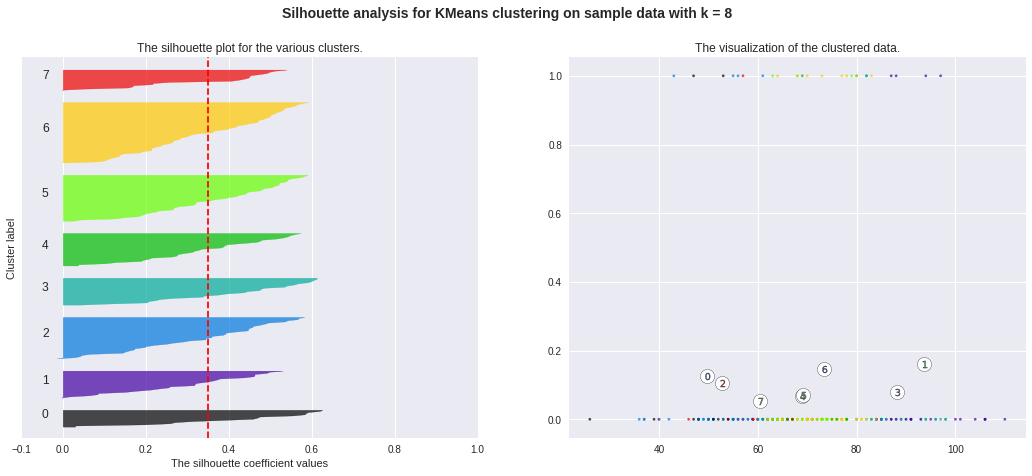

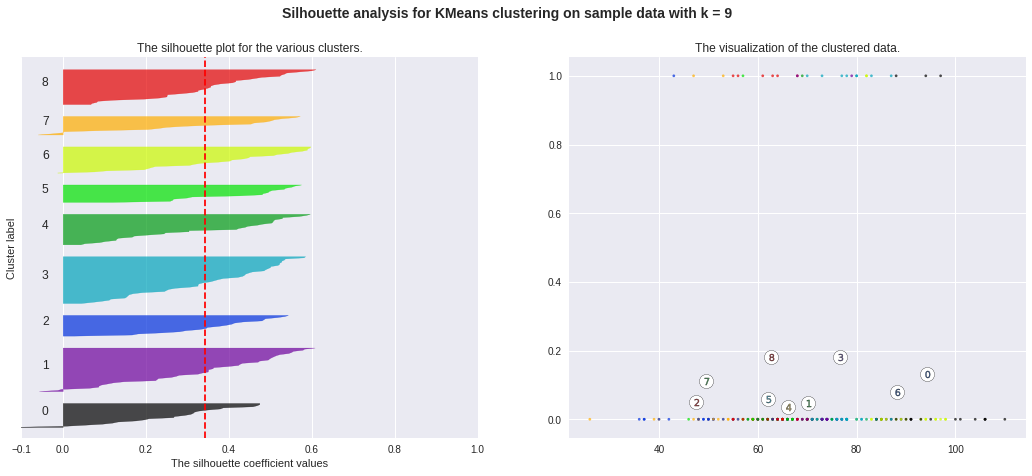

In [0]:
from __future__ import print_function
#print(__doc__)

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = df_raw.values
samples = 10

for k in range(2, samples):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    
    # The (k+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    # Initialize the model with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    model = cluster_kmeans(df_raw, k)
    cluster_labels = model.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f'When k = {k} the average silhouette_score is: {silhouette_avg}')

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor = color, edgecolor = color, alpha = 0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x = silhouette_avg, color = 'red', linestyle = '--')

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7,
                c = colors, edgecolor = 'k')

    # Labeling the clusters
    centers = model.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o',
                c = 'white', alpha = 1, s = 200, edgecolor = 'k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1,
                    s = 50, edgecolor = 'k')

    ax2.set_title('The visualization of the clustered data.')
    # ax2.set_xlabel('Feature space for the 1st feature')
    # ax2.set_ylabel('Feature space for the 2nd feature')

    plt.suptitle(('Silhouette analysis for KMeans clustering on sample data '
                  'with k = %d' % k),
                 fontsize = 14, fontweight = 'bold')

plt.show()

### Method 4: Gap Statistic Method

### Method 5: G-Means Algorithm

# Creating The Cluster

Now that we have a good value for k we can go ahead and create our model.

In [0]:
%time model = cluster_kmeans(df_raw, k = 3)

CPU times: user 38.4 ms, sys: 1.12 ms, total: 39.5 ms
Wall time: 45 ms


# Measuring Model Accuracy

Once you have a model you can run your test data and product a *Confusion Matrix* or *Error Matrix* which will be used to determine training errors.
![](https://github.com/harperd/machine-learning/blob/master/images/confusion-matrix.jpg?raw=1)

The accuracy is then measured by the below. This should be done for not only the training data set but to the test data set.
![](https://github.com/harperd/machine-learning/blob/master/images/accuracy.jpg?raw=1)